<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/esempio1_fit_popolazioneIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![metrodo scintifico](https://3.bp.blogspot.com/-srz1XJ37dE8/VgwypJp1xAI/AAAAAAAAJG0/BDSVcwHW2MQ/s1600/Metodo-Scientifico01-mini.jpg)
**Introduzione**

1.   ossevazione: raccolta dai dati (decisione, quali e come);
2.   ipotesi: modello matematico (decisione);
3.   verifica: contronto del modello con i dati;
4.   predizione: quando, dove, come...

**Strumento**

1.   notebook, jupyter, colab: https://colab.research.google.com/
2.   python (root, C, LabView...): https://www.python.org/




In [0]:
#
# inzializzazione delle funzioni (librerie) usate nel notebook
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import chisquare
plt.rc('font', size = 14, family ='Sans-Serif')

In [103]:
# caricamento dati raccolti (popolazione italiana 2018)
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=1qL5B_J6eV6bD9zicR0YsCIaUMU0BhTdSTrqC1UcDBI8&output=csv"
df = pd.read_csv(url_csv_file)
print(df)
print('\n')
print ('Popolazione: {0:.1f} [M], Superficie: {1:.1f} [km^2], Densità: {2:.1f}'.format(
    df['Popolazione'].sum()/1000, df['Superficie'].sum()/1000, df['Popolazione'].sum()/df['Superficie'].sum()))

                  Regione  Popolazione  Superficie  Densità  Comuni  Province
0               Lombardia    10060.574    23863.65      422    1506        12
1                   Lazio     5879.082    17232.29      341     378         5
2                Campania     5801.692    13670.95      424     550         5
3                 Sicilia     4999.891    25832.39      194     390         9
4                  Veneto     4905.854    18345.35      267     563         7
5          Emilia-Romagna     4459.477    22452.78      199     328         9
6                Piemonte     4356.406    25387.07      172    1181         8
7                  Puglia     4029.053    19540.90      206     257         6
8                 Toscana     3729.641    22987.04      162     273        10
9                Calabria     1947.131    15221.90      128     404         5
10               Sardegna     1639.591    24100.02       68     377         5
11                Liguria     1550.640     5416.21      286     

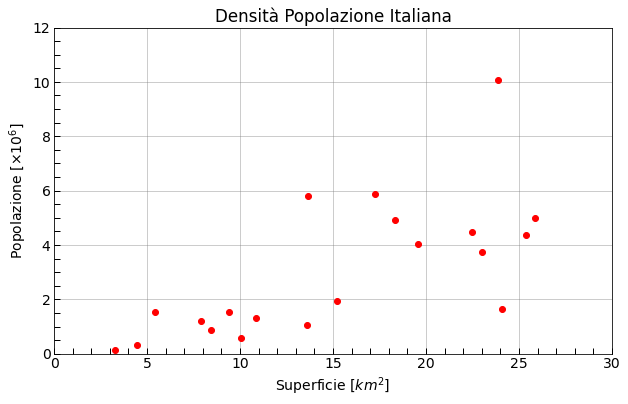

In [109]:
#
# Visualizziamo i dati
#
fig, ax = plt.subplots(figsize=(10,6))
x = df['Superficie']/1000
y = df['Popolazione']/1000
ax.plot(x,y,'ro')
ax.set_xlim(0,30)
ax.set_ylim(0,12)
ax.set_xlabel('Superficie [$km^2$]')
ax.set_ylabel(r'Popolazione [$\times 10^6$]')
plt.title('Densità Popolazione Italiana')
# for k in range(x.size):
#   plt.annotate(df['Regione'][k], (x[k],y[k]),fontsize=12)
plt.minorticks_on()
plt.grid()
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                grid_color='grey', grid_alpha=0.5)
plt.show()

In [0]:
#
# definisco il modello (lineare) 
#
def Line(x, m, q):
    return m*x + q

def chi2_e(y,fx,stdev):
  import numpy as np
  r = y - fx 
  return np.sum((r/stdev)**2)

$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} =  N \sum_{i=1}^n \frac{\left(O_i/N - p_i\right)^2}{p_i} $

where

$\chi^2$ = Pearson's cumulative test statistic, which asymptotically approaches a chi-squared distribution|$\chi^2$ distribution.

$O_i$ = the number of observations of type i.

$N$ = total number of observations

$E_i = N p_i$ = the expected (theoretical) count of type i, asserted by the null hypothesis that the fraction of type i in the population is $p_i$

$n$  = the number of cells in the table.

per un fit con errore il $\chi^2$ della distribuzione e' $\chi^2 = \sum_{i=1}^{n} \frac{(x_i - f(x_i))^2}{\sigma_i}$



In [111]:
#
# esguiamo il fit con la funzione che abbiamo scelto come modello con i minimi quadrati
# https://it.wikipedia.org/wiki/Metodo_dei_minimi_quadrati
# 
par, cov = curve_fit(Line,x, y, p0=[1,0])
err  = np.sqrt(np.diag(cov))
r2   = r2_score(y , Line(x, *par)) # https://it.wikipedia.org/wiki/Coefficiente_di_determinazione
chi2 = chisquare(y, Line(x, *par), ddof=len(df)-2) # https://it.wikipedia.org/wiki/Test_chi_quadrato
print(r'm = {0:.2f} ± {1:.2f} q = {2:.1f} ± {3:.1f} r2 = {4:.4f} chi2 = {5:.2f}, p = {6:.2f}'.format(
    par[0], err[0], par[1], err[1], r2, chi2[0], chi2[1]))

m = 0.24 ± 0.06 q = -0.5 ± 1.0 r2 = 0.4809 chi2 = 17.12, p = 0.00


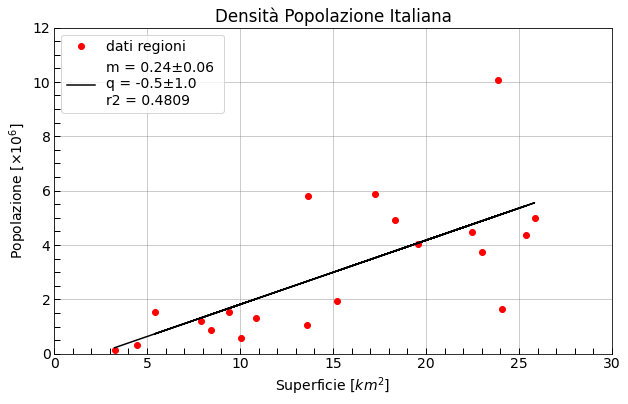

In [112]:
#
# Visualizziamo il risulatato
#
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y,'ro', label='dati regioni')
ax.plot(x,Line(x, *par), 'k-', 
        label='m = {0:.2f}±{1:.2f} \nq = {2:.1f}±{3:.1f} \nr2 = {4:.4f}'.format(par[0], err[0], par[1], err[1], r2))
ax.set_xlim(0,30)
ax.set_ylim(0,12)
ax.set_xlabel('Superficie [$km^2$]')
ax.set_ylabel(r'Popolazione [$\times 10^6$]')
plt.title('Densità Popolazione Italiana')
plt.minorticks_on()
plt.grid()
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
               grid_color='grey', grid_alpha=0.5)
plt.legend()
plt.show()

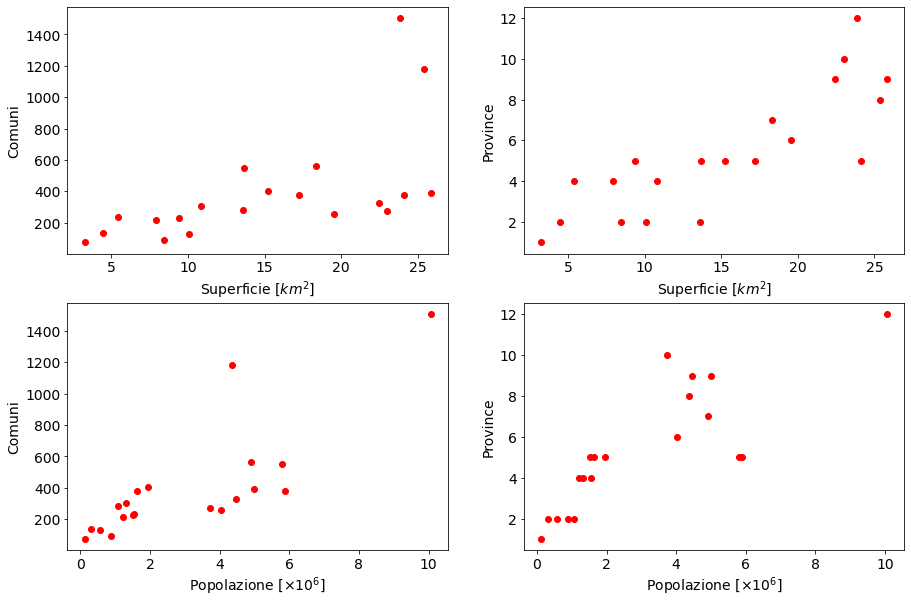

In [113]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
x = df['Superficie']/1000
y = df['Comuni']
ax[0,0].set_xlabel('Superficie [$km^2$]')
ax[0,0].set_ylabel('Comuni')
ax[0,0].plot(x,y,'ro')
x = df['Superficie']/1000
y = df['Province']
ax[0,1].set_xlabel('Superficie [$km^2$]')
ax[0,1].set_ylabel('Province')
ax[0,1].plot(x,y,'ro')
x = df['Popolazione']/1000
y = df['Comuni']
ax[1,0].set_xlabel(r'Popolazione [$\times 10^6$]')
ax[1,0].set_ylabel('Comuni')
ax[1,0].plot(x,y,'ro')
x = df['Popolazione']/1000
y = df['Province']
ax[1,1].set_xlabel(r'Popolazione [$\times 10^6$]')
ax[1,1].set_ylabel('Province')
ax[1,1].plot(x,y,'ro')
plt.show()

**Precauzioni!**

esitono vari modi di fare i fit, e anche in questo e' necessario decidere!
![alt text](https://camo.githubusercontent.com/732f5f5631f683f7da87f3489d4767ff6afe2315/687474703a2f2f6372736f757a612e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031302f30362f72616e736163385f7468756d622e706e67)

i minimi quadrati, e' il metoto piu' comune ma puo' sbagliare 
per questo si usano anche altri metodi che ottimizziano cio' che cerchimao come ad esempio RANSAC https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html e piu' in generale il Machine Leaning

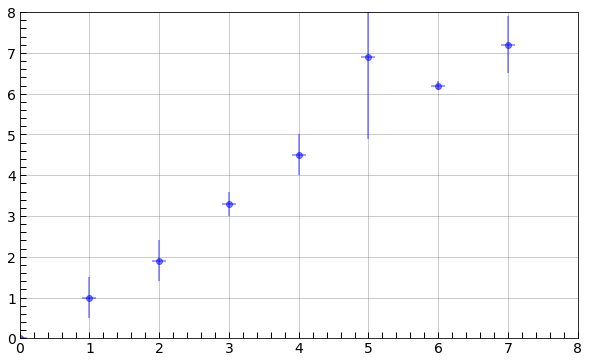

In [114]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([0, 1, 1.9, 3.3, 4.5, 6.9, 6.2, 7.2])
xerr = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
yerr = np.array([0.1, 0.5, 0.5, 0.3, 0.5, 2, 0.1, 0.7])

ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='bo', alpha=0.5)
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
               grid_color='grey', grid_alpha=0.5)
ax.set_xlim(0,8)
ax.set_ylim(0,8)
plt.minorticks_on()
plt.grid()
plt.show()

In [115]:
par, cov = curve_fit(Line,x, y, p0=[1,0], sigma=yerr)
err      = np.sqrt(np.diag(cov))
r2       = r2_score(y , Line(x, *par)) 
chi2     = chisquare(y, Line(x, *par))
chi2_2   = chi2_e(y, Line(x, *par), yerr)
print(r'm = {0:.2f} ± {1:.2f} q = {2:.1f} ± {3:.1f} r2 = {4:.4f} chi2_s = {5:.2f} p = {6:.2f}, chi2_fit = {7:.2f}'.format(
    par[0], err[0], par[1], err[1], r2, chi2[0], chi2[1], chi2_2))

m = 1.03 ± 0.01 q = 0.0 ± 0.1 r2 = 0.9414 chi2_s = 0.64 p = 1.00, chi2_fit = 1.80


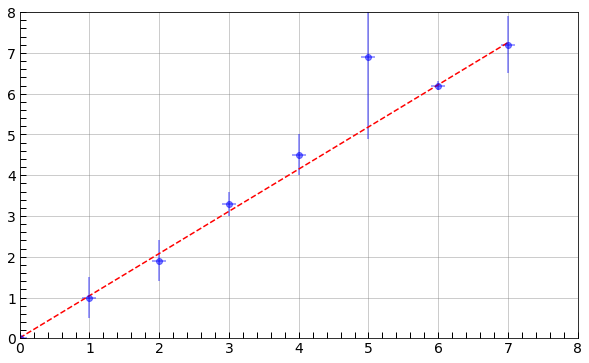

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='bo',alpha=0.5)
ax.plot(x, Line(x, *par), 'r--')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
               grid_color='grey', grid_alpha=0.5)
plt.minorticks_on()
ax.set_xlim(0,8)
ax.set_ylim(0,8)
plt.grid()
plt.show()